# Support Vector Machine Algorithm
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

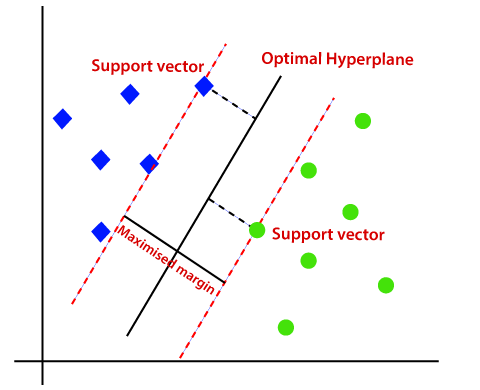

## Types of SVM
**Linear SVM:** Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

**Non-linear SVM:** Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

## Terminologies
#### Hyperplane: 
There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out the best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.

The dimensions of the hyperplane depend on the features present in the dataset, which means if there are 2 features (as shown in image), then hyperplane will be a straight line. And if there are 3 features, then hyperplane will be a 2-dimension plane.

**Best Hyperplane:** Hyperplane that has a maximum margin, which means the maximum distance between the data points.

#### Support Vectors:
The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.

# Implementation of SVM on iris dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# create new column that contains fower_names obtained from tardet features
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# create 3 dataframes (just for visualization purpose)
df0 = df[:50]        # 'setosa'
df1 = df[50:100]     # 'versicolor'
df2 = df[100:]       # 'virginica'

## Visualisation
### Sepal length vs Sepal Width (Setosa vs Versicolor)

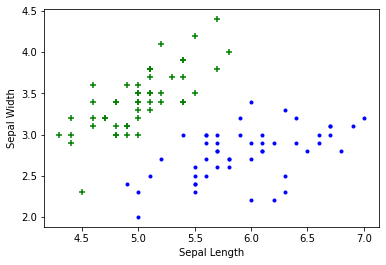

In [10]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

### Petal length vs Pepal Width (Setosa vs Versicolor)

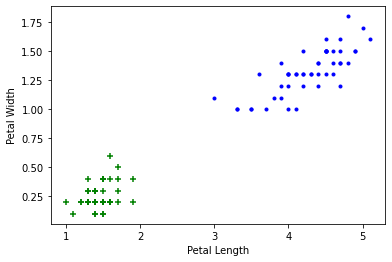

In [11]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [12]:
# Thus we find that the features of each category differs and can be seperated by using hyperplane

## Train Using Support Vector Machine (SVM)

In [13]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [16]:
model.score(X_test, y_test)

1.0

In [17]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

## Tune parameters

### 1. Regularization (C)

In [18]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

In [19]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

### 2.Gamma

In [20]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9

### 3.Kernel

In [21]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
model_linear_kernal.score(X_test, y_test)

1.0

# Note: 
**This notebook gives an gentle introduction to SVM with no mathematical explanation working behind.** <br>
**The various Measuring attributes (Kernel, Gamma, Regularization(C)) will be discussed in detail later.**<br>
**Complex Hyperparameter Turning will be performed in future projects.**

## Effects of Hyperparameters on SVM: (will be discussed in detail later)
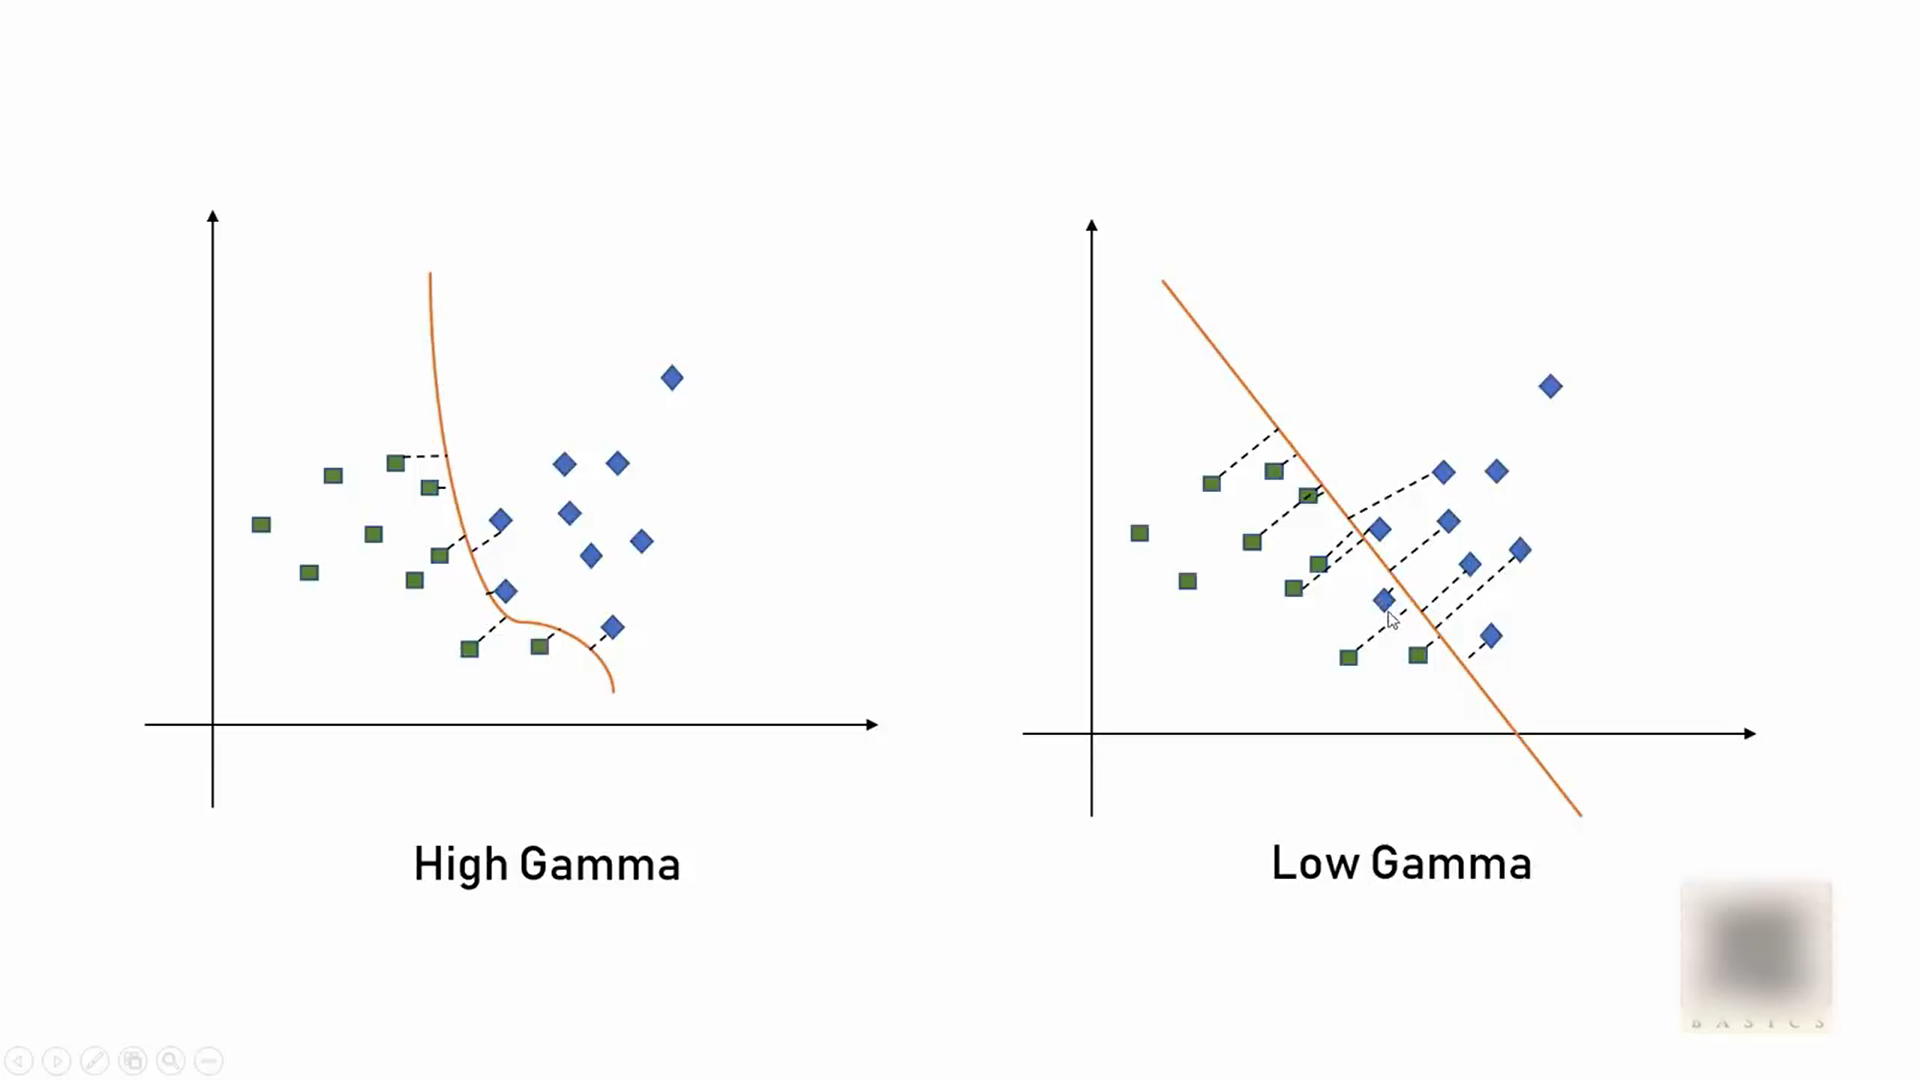

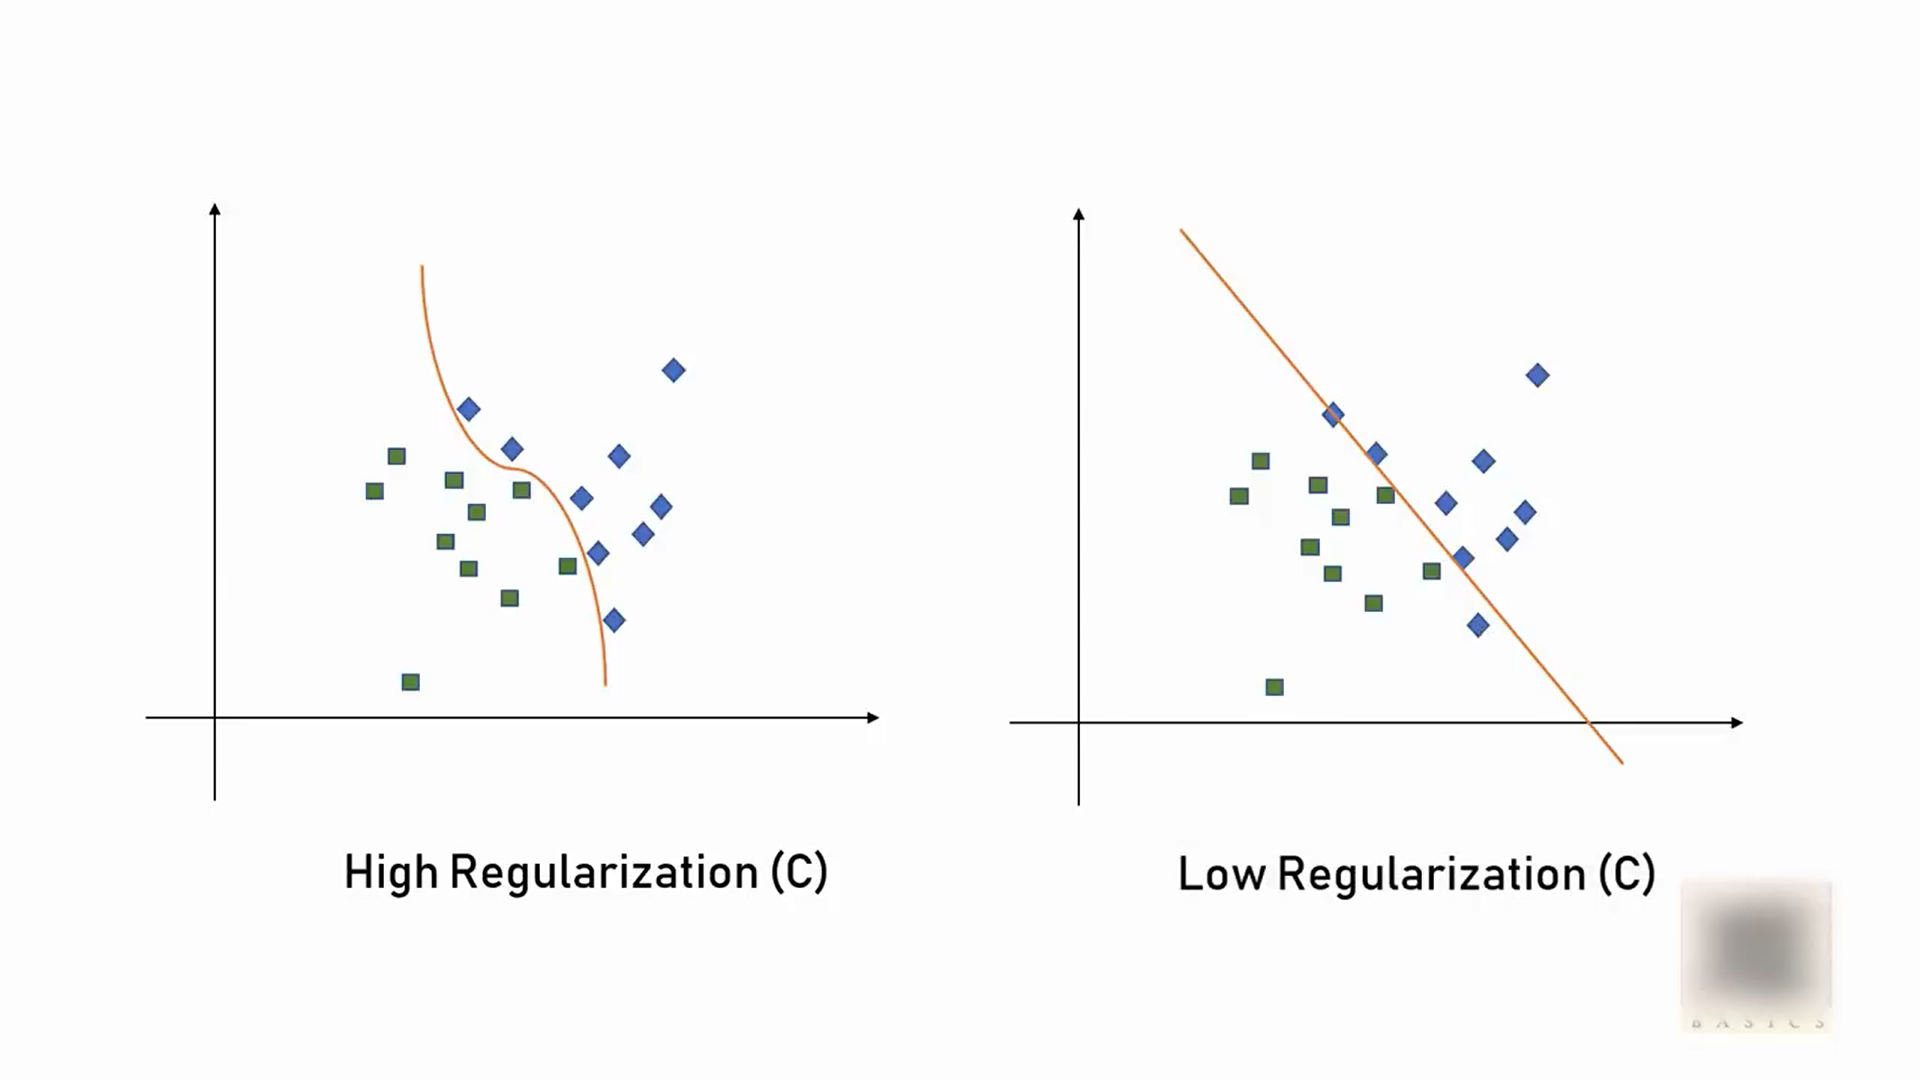